# Datos desbalanceados. Usando Imbalanced Learn y otros mètodos de entrenamiento. 

In [63]:
# Ficheros primarios necesarios.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier

from pylab import rcParams

from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedBaggingClassifier


from collections import Counter

# Gráficos
# ==============================================================================
from matplotlib import style


rcParams['figure.figsize'] = 14, 8.7 
LABELS = ["Normal","Fraud"]
%matplotlib inline


### Dataframe. 

In [12]:
mainpath = "/Users/macbook/Python Programs/datasets/"
filename = "Datos/BaseDatos2020.xlsx"
fullpad = fullpath = os.path.join(mainpath, filename)

In [13]:
df = pd.read_excel(fullpath)

In [15]:
df.head(15)

,Edad,Sexo_T,PlazoYr360,PrimaAnualEst,Frec_Pago_Mensual,Sobrevive
0,66,0,1.000000,1.917595,0,0
1,41,1,1.000000,0.018418,1,0
2,66,0,1.000000,-0.149204,1,0
3,32,1,1.000000,-0.348033,0,0
4,49,1,2.116667,0.141711,1,1
5,41,0,1.802778,2.750068,1,1
6,32,0,2.508333,0.865052,0,1
7,25,0,1.083333,-0.107941,1,0
8,62,0,2.483333,-0.293556,1,1
9,55,0,2.425000,-0.071503,1,1


### Implementación de la regresión logísitica. Y datos de entrenamiento. 

/Users/macbook/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Intercept: [-12.78492767]
Coeficiente: [('Edad', 0.0123494654815647), ('Sexo_T', 0.052139794708644674), ('PlazoYr360', 6.356317716155302), ('PrimaAnualEst', 0.021752840534136945), ('Frec_Pago_Mensual', 0.4771642250578436)]
Accuracy de entrenamiento: 0.9184624528589688


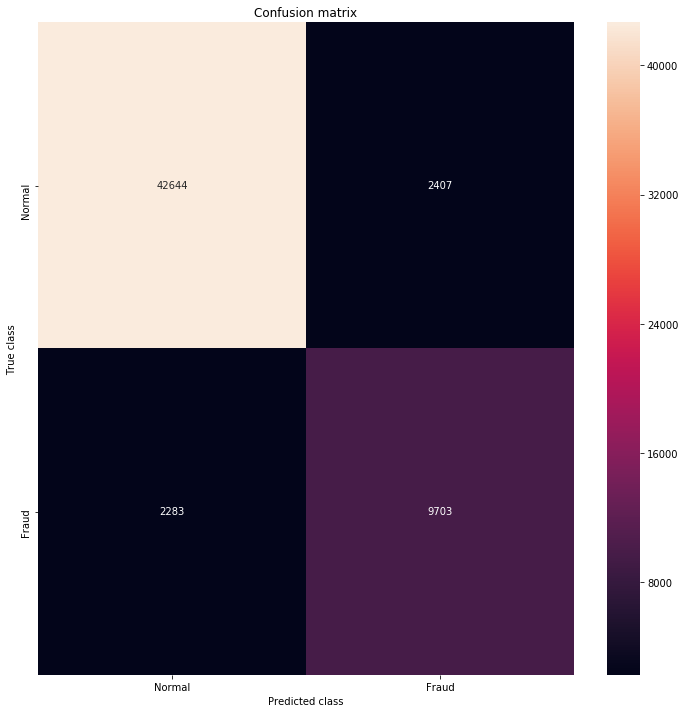

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     45051
           1       0.80      0.81      0.81     11986

   micro avg       0.92      0.92      0.92     57037
   macro avg       0.88      0.88      0.88     57037
weighted avg       0.92      0.92      0.92     57037



In [56]:
y = df['Sobrevive']
X = df.drop('Sobrevive', axis=1)
#dividimos en sets de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)
 
#creamos una función que crea el modelo que usaremos cada vez
def run_model(X_train, X_test, y_train, y_test):
    clf_base = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg")
    result = clf_base.fit(X_train, y_train)
    print("Intercept:", clf_base.intercept_)
    print("Coeficiente:", list(zip(X.columns, clf_base.coef_.flatten(), )))
    print("Accuracy de entrenamiento:", clf_base.score(X, y))
    
    
    return clf_base
  


 
#ejecutamos el modelo "tal cual"
model = run_model(X_train, X_test, y_train, y_test)

 
#definimos funciona para mostrar los resultados
def mostrar_resultados(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(12, 12))
    sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(y_test, pred_y))
 
pred_y = model.predict(X_test)
mostrar_resultados(y_test, pred_y)



### Implementación de el modelo de regresión logística desde statsmodels.

In [39]:
# Ficheros. 
import statsmodels.api as sm

#Definición de variables. 
y = df['Sobrevive']
X = df.drop('Sobrevive', axis=1)
# Sets de entrenamiento. 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)


logit_model = sm.Logit(y_train, X_train)






/Users/macbook/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [40]:
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.333505
         Iterations 7


In [41]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
===================================================================
Model:                Logit            Pseudo R-squared: 0.353     
Dependent Variable:   Sobrevive        AIC:              88778.2695
Date:                 2022-11-16 10:19 BIC:              88827.2632
No. Observations:     133084           Log-Likelihood:   -44384.   
Df Model:             4                LL-Null:          -68631.   
Df Residuals:         133079           LLR p-value:      0.0000    
Converged:            1.0000           Scale:            1.0000    
No. Iterations:       7.0000                                       
-------------------------------------------------------------------
                   Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
Edad              -0.1071   0.0007 -157.5867 0.0000 -0.1085 -0.1058
Sexo_T            -0.6002   0.0178  -33.6380 0.0000 -0.6351 -0.5652
PlazoYr360         3.9008   0.0227  172.1238 0.0000  3.8564  3.9452
PrimaAnualEst      0.3329   0.0083   39.9395 0.0000  0.3166  0.3492
Frec_Pago_Mensual -2.7217   0.0243 -111.9563 0.0000 -2.7694 -2.6741
===================================================================

"""

In [55]:
# Intervalos de confianza para los coeficientes del modelo
# ==============================================================================
intervalos_ci = result.conf_int(alpha=0.05)
intervalos_ci = pd.DataFrame(intervalos_ci)
intervalos_ci.columns = ['2.5%', '97.5%']
intervalos_ci

,2.5%,97.5%
Edad,-0.108459,-0.105794
Sexo_T,-0.635130,-0.565192
PlazoYr360,3.856410,3.945247
PrimaAnualEst,0.316564,0.349237
Frec_Pago_Mensual,-2.769366,-2.674070


### Modelo de regresión logística scikit-learn.

In [70]:
# División de los datos en train y test
# ==============================================================================
y = df['Sobrevive']
X = df.drop('Sobrevive', axis=1)

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values,
                                        y.values,
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

# Creación del modelo
# ==============================================================================
# Para no incluir ningún tipo de regularización en el modelo se indica
# penalty='none'
modelo = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg")
modelo.fit(X = X_train, y = y_train)

/Users/macbook/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=1, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [71]:
# Información del modelo. ==============================================================================
print("Intercept:", modelo.intercept_)
print("Coeficiente:", list(zip(X.columns, modelo.coef_.flatten(), )))
print("Accuracy de entrenamiento:", modelo.score(X, y))


Intercept: [-12.77544864]
Coeficiente: [('Edad', 0.011661921105566913), ('Sexo_T', -0.0004906087510079263), ('PlazoYr360', 6.371407254156929), ('PrimaAnualEst', 0.029206130348983478), ('Frec_Pago_Mensual', 0.49884488056591286)]
Accuracy de entrenamiento: 0.9186202471057905


In [72]:
# Predicciones probabilísticas
# ==============================================================================
# Con .predict_proba() se obtiene, para cada observación, la probabilidad predicha
# de pertenecer a cada una de las dos clases.
predicciones = modelo.predict_proba(X = X_test)
predicciones = pd.DataFrame(predicciones, columns = modelo.classes_)
predicciones.head(3)

,0,1
0,0.772927,0.227073
1,0.985698,0.014302
2,0.995558,0.004442


### Modelo. Estrategia penalización. 

Intercept: [-14.05478706]
Coeficiente: [('Edad', 0.010441065603668209), ('Sexo_T', 0.039484134407319765), ('PlazoYr360', 7.8937380888075515), ('PrimaAnualEst', 0.028570962241042837), ('Frec_Pago_Mensual', 0.3709767897540281)]
Accuracy de entrenamiento: 0.941153265551938


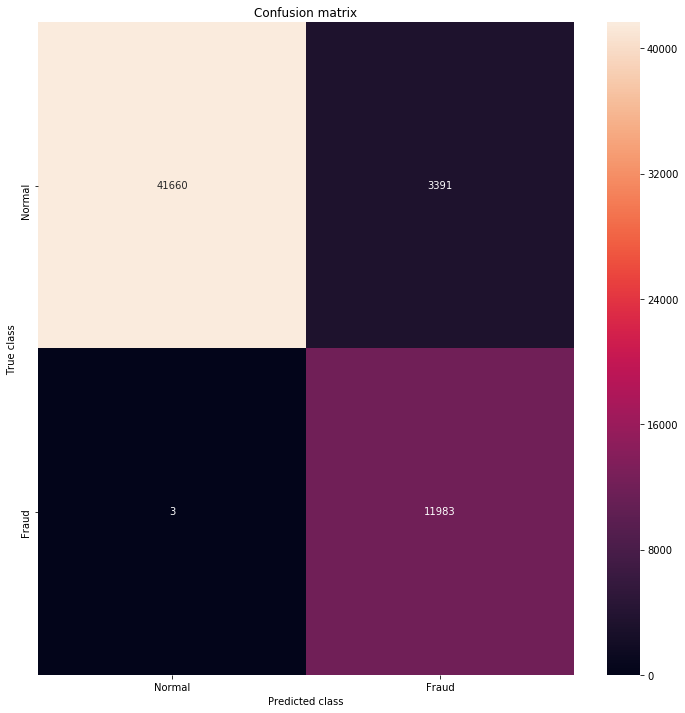

              precision    recall  f1-score   support

           0       1.00      0.92      0.96     45051
           1       0.78      1.00      0.88     11986

   micro avg       0.94      0.94      0.94     57037
   macro avg       0.89      0.96      0.92     57037
weighted avg       0.95      0.94      0.94     57037



In [58]:
def run_model_balanced(X_train, X_test, y_train, y_test):
    clf = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg",class_weight="balanced")
    clf.fit(X_train, y_train)
    print("Intercept:", clf.intercept_)
    print("Coeficiente:", list(zip(X.columns, clf.coef_.flatten(), )))
    print("Accuracy de entrenamiento:", clf.score(X, y))
    return clf
 
model = run_model_balanced(X_train, X_test, y_train, y_test)
pred_y = model.predict(X_test)
mostrar_resultados(y_test, pred_y)



### Estrategia: Oversampling de la clase minoritaria

Distribution before resampling Counter({0: 104858, 1: 28226})
Distribution labels after resampling Counter({0: 104858, 1: 52429})
Intercept: [-13.24984927]
Coeficiente: [('Edad', 0.011228067756571156), ('Sexo_T', 0.048796690406675565), ('PlazoYr360', 7.020729231424347), ('PrimaAnualEst', 0.02128321462672838), ('Frec_Pago_Mensual', 0.4137303649959793)]
Accuracy de entrenamiento: 0.9377238705876784


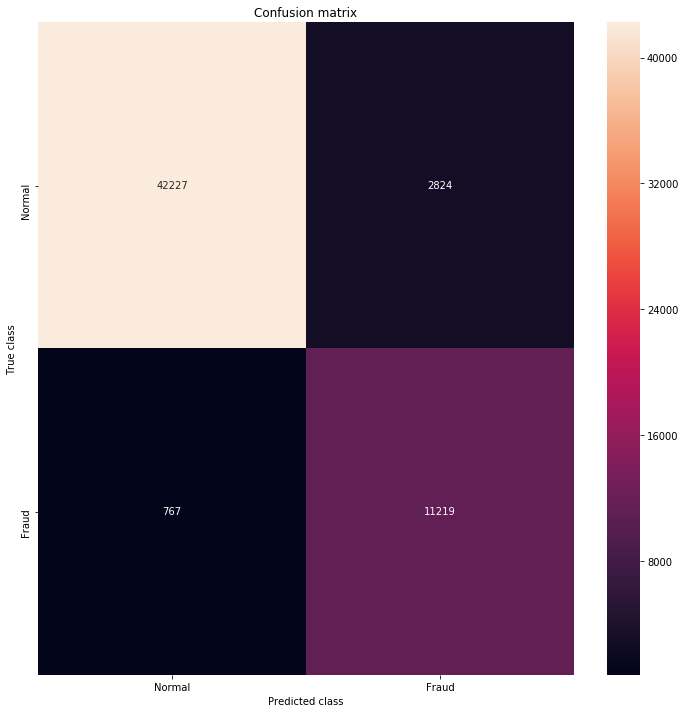

              precision    recall  f1-score   support

           0       0.98      0.94      0.96     45051
           1       0.80      0.94      0.86     11986

   micro avg       0.94      0.94      0.94     57037
   macro avg       0.89      0.94      0.91     57037
weighted avg       0.94      0.94      0.94     57037



In [59]:
os =  RandomOverSampler(ratio=0.5)
X_train_res, y_train_res = os.fit_sample(X_train, y_train)
 
print ("Distribution before resampling {}".format(Counter(y_train)))
print ("Distribution labels after resampling {}".format(Counter(y_train_res)))
 
model = run_model(X_train_res, X_test, y_train_res, y_test)
pred_y = model.predict(X_test)
mostrar_resultados(y_test, pred_y)

### Estrategia: Combinamos resampling con Smote-Tomek

Distribution before resampling Counter({0: 104858, 1: 28226})
Distribution after resampling Counter({0: 103195, 1: 50766})
Intercept: [-14.5109271]
Coeficiente: [('Edad', 0.011932798074823246), ('Sexo_T', 0.044658084453968384), ('PlazoYr360', 7.766136535373773), ('PrimaAnualEst', 0.03970893439672057), ('Frec_Pago_Mensual', 0.43635408121988234)]
Accuracy de entrenamiento: 0.9391334991926195


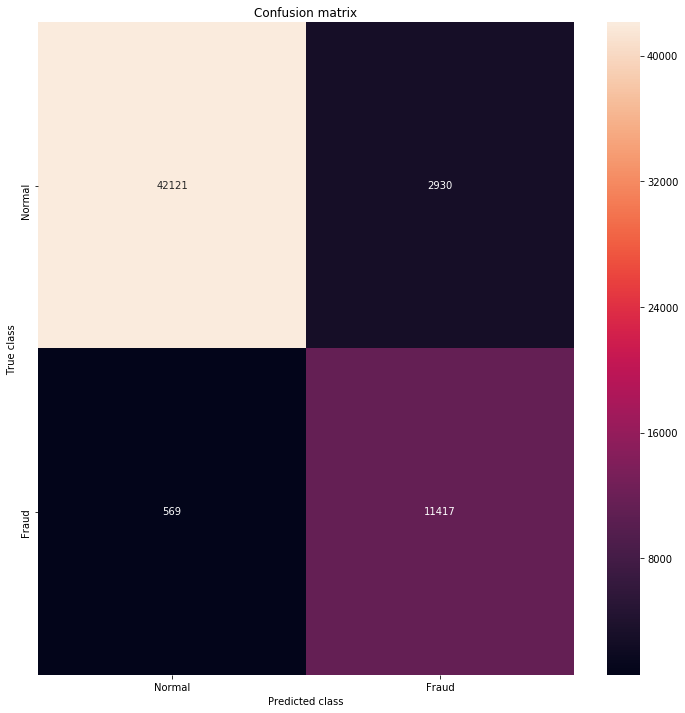

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     45051
           1       0.80      0.95      0.87     11986

   micro avg       0.94      0.94      0.94     57037
   macro avg       0.89      0.94      0.91     57037
weighted avg       0.95      0.94      0.94     57037



In [60]:
os_us = SMOTETomek(ratio=0.5)
X_train_res, y_train_res = os_us.fit_sample(X_train, y_train)
 
print ("Distribution before resampling {}".format(Counter(y_train)))
print ("Distribution after resampling {}".format(Counter(y_train_res)))
 
model = run_model(X_train_res, X_test, y_train_res, y_test)
pred_y = model.predict(X_test)
mostrar_resultados(y_test, pred_y)